# Creating simulated images of the JWST astrometric calibration field in the LMC


In this tutorial we show step by step instructions to simulate images of the JWST LMC astrometric calibration field. The NIRCam images are simulated using the software MIRAGE. The observation is designed in APT. The APT output is used as input of MIRAGE.

This Notebook must be executed from an environment that has MIRAGE installed. Follow the instructions in the [Installing MIRAGE webpage](https://mirage-data-simulator.readthedocs.io/en/latest/install.html) before executing this Jupyter Notebook. 

## Setting things up

In [2]:
import os
path='/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/'  # write here your working directory
os.chdir(path)
print(os.getcwd())

/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook


We import several packages

In [3]:
# mirage imports
from mirage import imaging_simulator
from mirage.seed_image import catalog_seed_image
from mirage.dark import dark_prep
from mirage.ramp_generator import obs_generator
from mirage.yaml import yaml_generator


We define the location of the MIRAGE data. This is the directory that contains the reference files associated with MIRAGE. 

In [8]:
os.environ['MIRAGE_DATA'] = '/ifs/jwst/wit/mirage_data/'  # this is the STScI location of MIRAGE data

## Generating input yaml files

We begin the simulation using the programme's APT file. The xml and pointings files must be exported from APT, and are then used as input to the yaml_generator, which will generate a series of yaml input files.

From APT we export two files: the xml and pointing files. These should be in the working directory.


In [4]:
# Specify the xml and pointing files exported from APT
xml_file = 'NRC21_pid1069_2018_rev2.xml'
pointing_file = 'NRC21_pid1069_2018_rev2.pointing'


In [5]:
# Optionally set the telescope roll angle (PAV3) for the observations
pav3=0.0

# Define the output directory
output_dir = path



In this example we create NIRCam images based on a catalogue (all_filters_lmc.cat) of point sources. This catalogue contains the AB magnitude of each source in the following six filters: F070W, F150W, F200W, F277W, F356W, and F444W. 

In [ ]:
# Source catalogs to be used
cat_dict = { 'LMC-ASTROMETRIC-FIELD': {'nircam': {'point_source': 'all_filters_lmc.cat'} ,
                                          'fgs': {'point_source': 'dummy.cat'} } ,
             '2 LMC-ASTROMETRIC-FIELD': {'nircam': {'point_source': 'all_filters_lmc.cat'} ,
                                          'fgs': {'point_source': 'dummy.cat'} } }



## Running the yaml_generator
This will create a collection of yaml files that will be used as input when creating the simulated data. There will be one yaml file for each detector and exposure, so there can be quite a few files created if your programme has lots of exposures or dithers. This LMC  programme will generate 528 files using six NIRCam filters and the JWST FGS. 

In [6]:
# Run the yaml generator
yam = yaml_generator.SimInput(xml_file, pointing_file, 
                              catalogs=cat_dict, 
                              verbose=True,
                              simdata_output_dir= output_dir,
                              output_dir=output_dir,
                              roll_angle=pav3, 
                              datatype='linear,raw')
yam.use_linearized_darks = True
yam.create_inputs()

CRDS_PATH environment variable not set. Setting to /Users/lubeda/crds_cache
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Observation `001` labelled `Module B at center, FGS1` uses template `NircamEngineeringImaging`
APTObservationParams Dictionary holds 0 entries before reading template
Coordinated parallel observation
Number of dithers: 2 primary * 1 subpixel = 2
Prime: NIRCAM   Parallel: FGS
PRIME TEMPLATE NAME IS: NircamEngineeringImaging
Dictionary read from template has 6 entries.
Found 4 tile(s) for observation 001 Module B at center, FGS1
Found 4 visits with numbers: [1, 2, 3, 4]
APTObservationParams Dictionary holds 24 entries after reading template (+24 entries)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Observation `002` labelled `Module A at center, FGS2` uses template `NircamEngineeringImaging`
APTObservationParams Dictionary holds 24 entries before reading temp

## Organizing files according to filter

In [4]:
from glob import glob
import yaml
import os.path
import shutil

In [10]:
path = os.getcwd()
files = glob('jw*yaml')
allfiles = glob('jw*')

if not os.path.exists(path+'/mirage_output/'):
	os.mkdir(path+'/mirage_output/')
if not os.path.exists(path+'/pipeline_level1/'):
	os.mkdir(path+'/pipeline_level1/')
if not os.path.exists(path+'/pipeline_level2/'):
	os.mkdir(path+'/pipeline_level2/')
if not os.path.exists(path+'/yaml/'):
	os.mkdir(path+'/yaml/')

In [11]:
# we organize files according to filter
for yamlfile in files:
	#print(yamlfile)
	with open(yamlfile, 'r') as stream:
	    doc = yaml.load(stream)
	    filtname = doc['Readout']['filter']
	    if not os.path.exists(path+'/yaml/'+filtname.lower()):
        	os.mkdir(path+'/yaml/'+filtname.lower())
	
	filetomove = yamlfile  
	input_file = filetomove
	output_file = path+'/yaml/'+filtname.lower() 
	print('input  = ',input_file)
	print('output = ',output_file)
	shutil.move(input_file, output_file)


/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


input  =  jw01069002001_01101_00001_nrca1.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f070w
input  =  jw01069001001_01101_00001_nrcb2.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f070w
input  =  jw01069001004_01201_00019_g1.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/none
input  =  jw01069001001_01201_00001_g1.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/none
input  =  jw01069002004_01101_00023_nrcb5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f356w
input  =  jw01069002004_01101_00021_nrca5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f277w
input  =  jw01069001003_01101_00013_nrca1.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f070w
input  =  jw01069002003_01101_00013_nrcb2.yaml
output =  /Users/lubeda/astronomy/nirspec/te

# Execute MIRAGE and create simulated data
Now that the yaml files have been generated, we can execute MIRAGE using them as input parameters and generate the NIRCam images.

In [1]:
# import a few necessary modules
from glob import glob
from mirage.seed_image import catalog_seed_image
from mirage.dark import dark_prep
from mirage.ramp_generator import obs_generator
from astropy.table import Table
import yaml

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/pysynphot/locations.py:47: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


As an example, let us choose filter F444W. We are going to simulate all the images that were observed using filter F444W. The variable "listname" contains the names of the yaml files that we want to process through MIRAGE. There are 32 F444W yaml files. As a short example here we process only the first two yaml files. 

In [12]:
# input parameters
listname = 'values-f444w.txt'
filtname = 'f444w'
# input parameters

In [13]:
# copy the F444W yaml files back in the working directory
import os
path = os.getcwd()
files = glob(path+ '/yaml/'+filtname+'/jw*yaml')
#print(path+ '/yaml/'+filtname+'/jw*yaml')
#print(files)
for yamlfile in files:
    input_file = yamlfile         
    output_file = path 
    print('input  = ',input_file)
    print('output = ',output_file)
    shutil.copy(input_file, output_file)

input  =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f444w/jw01069002003_01101_00014_nrcb5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook
input  =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f444w/jw01069002004_01101_00019_nrcb5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook
input  =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f444w/jw01069001004_01101_00020_nrca5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook
input  =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f444w/jw01069001001_01101_00001_nrca5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook
input  =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/yaml/f444w/jw01069002003_01101_00013_nrca5.yaml
output =  /Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook
input  =  /Users/lubeda/astron

In [14]:
# read the list of yaml files to process
t = Table.read(listname, format='ascii')
inputyaml = t['file']
yamllist = []
for k in range(len(inputyaml)):
    yamllist.append(inputyaml[k])

print(yamllist)

files = yamllist
paramlist = yamllist
#print(len((files))
print(files)

['jw01069001001_01101_00001_nrcb5.yaml', 'jw01069001001_01101_00002_nrca5.yaml', 'jw01069001001_01101_00002_nrcb5.yaml', 'jw01069001002_01101_00007_nrca5.yaml', 'jw01069001002_01101_00007_nrcb5.yaml', 'jw01069001002_01101_00008_nrca5.yaml', 'jw01069001002_01101_00008_nrcb5.yaml', 'jw01069001003_01101_00013_nrca5.yaml', 'jw01069001003_01101_00013_nrcb5.yaml', 'jw01069001003_01101_00014_nrca5.yaml', 'jw01069001003_01101_00014_nrcb5.yaml', 'jw01069001004_01101_00019_nrca5.yaml', 'jw01069001004_01101_00019_nrcb5.yaml', 'jw01069001004_01101_00020_nrca5.yaml', 'jw01069001004_01101_00020_nrcb5.yaml', 'jw01069002001_01101_00001_nrca5.yaml', 'jw01069002001_01101_00001_nrcb5.yaml', 'jw01069002001_01101_00002_nrca5.yaml', 'jw01069002001_01101_00002_nrcb5.yaml', 'jw01069002002_01101_00007_nrca5.yaml', 'jw01069002002_01101_00007_nrcb5.yaml', 'jw01069002002_01101_00008_nrca5.yaml', 'jw01069002002_01101_00008_nrcb5.yaml', 'jw01069002003_01101_00013_nrca5.yaml', 'jw01069002003_01101_00013_nrcb5.yaml',

In [15]:
# here we loop over the yaml files and run MIRAGE in a sequence
for yamlfile in files:
    print('---------------------processing ',yamlfile,'  -------------------------------')
    base=os.path.basename(yamlfile)
    os.path.splitext(base)
    name = os.path.splitext(base)[0]
    # generate the seed image
    cat = catalog_seed_image.Catalog_seed()
    cat.paramfile = yamlfile
    cat.make_seed()
    # prepare the dark current exposure
    d = dark_prep.DarkPrep()
    d.paramfile = yamlfile
    d.prepare()
    # create the final exposure
    obs = obs_generator.Observation()
    obs.linDark = d.prepDark
    obs.seed = cat.seedimage
    obs.segmap = cat.seed_segmap
    obs.seedheader = cat.seedinfo
    obs.paramfile = yamlfile
    obs.create()

CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits   16.8 M bytes  (1 / 1 files) (0 / 16.8 M bytes)


---------------------processing  jw01069001001_01101_00001_nrcb5.yaml   -------------------------------


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits   67.1 M bytes  (1 / 1 files) (0 / 67.1 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits  134.2 M bytes  (1 / 1 files) (0 / 134.2 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits   33.6 M bytes  (1 / 1 files) (0 / 33.6 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits   16.8 M bytes  (1 / 1 files) (0 / 16.8 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits   50.4 M bytes  (1 / 1 files) (0 / 50.4 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.


CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_ipc_0023.fits   11.5 K bytes  (1 / 1 files) (0 / 11.5 K bytes)
CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0096.asdf    7.7 K bytes  (1 / 1 files) (0 / 7.7 K bytes)
CRDS - INFO -  Fetching  /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_area_0026.fits   16.8 M bytes  (1 / 1 files) (0 / 16.8 M bytes)


From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits as the pixelflat reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_ipc_0023.fits as the ipc reference file.
No inverted IPC kernel file found. Kernel will be inverted prior to use.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_distortion_0096.asdf as the astrometric reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_area_0026.fits as the pixelAreaMap reference file.
Requested readout pattern BRIGHT1 is valid. Using the nframe = 1 and nskip = 1
No galaxy catalog provided in yaml file.
SIAF: Requested NRCB5_FULL   got NRCB5_FULL
Calculating background rate using jwst_background based on low level
Using /Users/lubeda/mirage/mirage/config/F444W_nircam_plus_ote_throughput_modb_sorted.txt filter throughput file for background calculation.
Background rate determined using requested level:

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00001_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00001_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001001_01101_00002_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00002_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00002_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001001_01101_00002_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00002_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00002_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001002_01101_00007_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00007_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00007_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001002_01101_00007_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00007_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00007_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001002_01101_00008_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00008_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00008_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001002_01101_00008_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00008_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001002_01101_00008_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001003_01101_00013_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00013_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00013_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001003_01101_00013_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00013_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00013_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001003_01101_00014_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00014_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00014_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001003_01101_00014_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00014_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001003_01101_00014_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001004_01101_00019_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00019_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00019_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001004_01101_00019_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00019_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00019_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001004_01101_00020_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00020_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00020_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001004_01101_00020_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00020_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001004_01101_00020_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002001_01101_00001_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00001_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00001_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002001_01101_00001_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00001_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00001_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002001_01101_00002_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00002_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00002_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002001_01101_00002_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00002_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002001_01101_00002_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002002_01101_00007_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00007_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00007_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002002_01101_00007_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00007_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00007_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002002_01101_00008_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00008_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00008_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002002_01101_00008_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00008_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002002_01101_00008_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002003_01101_00013_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00013_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00013_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002003_01101_00013_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00013_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00013_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002003_01101_00014_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00014_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00014_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002003_01101_00014_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00014_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002003_01101_00014_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002004_01101_00019_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00019_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00019_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002004_01101_00019_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00019_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00019_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002004_01101_00020_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00020_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00020_nrca5_uncal.fits
Observation generation complete.
---------------------processing  jw01069002004_01101_00020_nrcb5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0032.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0021.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0049.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0066.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0054.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0339.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00020_nrcb5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:43: RuntimeWarning: invalid value encountered in greater_equal
  numhigh = np.where(image >= lin_satmap)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:101: RuntimeWarning: invalid value encountered in greater
  bad = np.where(values > limits)
/User

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069002004_01101_00020_nrcb5_uncal.fits
Observation generation complete.
---------------------processing  jw01069001001_01101_00001_nrca5.yaml   -------------------------------
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_mask_0038.fits as the badpixmask reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_superbias_0022.fits as the superbias reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_linearity_0052.fits as the linearity reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_saturation_0063.fits as the saturation reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_gain_0056.fits as the gain reference file.
From CRDS, found /Users/lubeda/crds_cache/references/jwst/nircam/jwst_nircam_flat_0313.fits

/Users/lubeda/opt/anaconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/validate.py:35: ValidationWarning: While validating primary_type the following error occurred:
'INTRAMODULEBOX' is not one of ['2-POINT', '2-POINT-NOD', '3-POINT-NOD', '4-POINT', '4-POINT-NOD', '4-POINT-DITHER', '4-POINT-SETS', '5-POINT-NOD', '5-POINT-SMALL-GRID', '9-POINT-SMALL-GRID', 'ALONG-SLIT-NOD', 'CYCLING', 'EXTENDED-SOURCE', 'FULL', 'FULL-TIGHT', 'GAUSSIAN', 'INTRAMODULE', 'INTRASCA', 'MAPPING', 'NONE', 'POINT-SOURCE', 'REULEAUX', 'SPARSE-CYCLING', 'WFSC']

Failed validating 'enum' in schema:
    {'$schema': 'http://stsci.edu/schemas/asdf-schema/0.1.0/asdf-schema',
     'blend_table': True,
     'enum': ['2-POINT',
              '2-POINT-NOD',
              '3-POINT-NOD',
              '4-POINT',
              '4-POINT-NOD',
              '4-POINT-DITHER',
              '4-POINT-SETS',
              '5-POINT-NOD',
              '5-POINT-SMALL-GRID',
              '9-POINT-SMALL-GRID',
          

Final linearized exposure saved to:
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00001_nrca5_linear.fits


/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:55: RuntimeWarning: divide by zero encountered in true_divide
  x[i1] = (image[i1]+image[i1]/val[i1]) / 2.
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:60: RuntimeWarning: divide by zero encountered in true_divide
  dev[i1] = abs(image[i1]/val[i1]-1.)
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in greater
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:39: RuntimeWarning: invalid value encountered in less
  i1 = np.where((image > 0.) & (image < lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in less_equal
  i2 = np.where((image <= 0.) | (image >= lin_satmap))
/Users/lubeda/mirage/mirage/ramp_generator/unlinearize.py:42: RuntimeWarning: invalid value encountered in greater_equal
  i2 = np.where((image <= 0.) | (image >= lin_satm

Final raw exposure saved to
/Users/lubeda/astronomy/nirspec/team_study/preimaging/notebook/jw01069001001_01101_00001_nrca5_uncal.fits
Observation generation complete.



## Examine the output
Here we display the output files generated by MIRAGE. The UNCAL file is the raw uncalibrated file. 

### Seed image
The seed image contains only the signal from the astronomical sources and background. There are no detector effects, nor cosmic rays added to this count rate image.


In [20]:
# import a few packages
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def show(array,title,min=0,max=1000):
    plt.figure(figsize=(12,12))
    plt.imshow(array,clim=(min,max))
    plt.title(title)
    plt.colorbar().set_label('DN$^{-}$/s')

(2048, 2048)


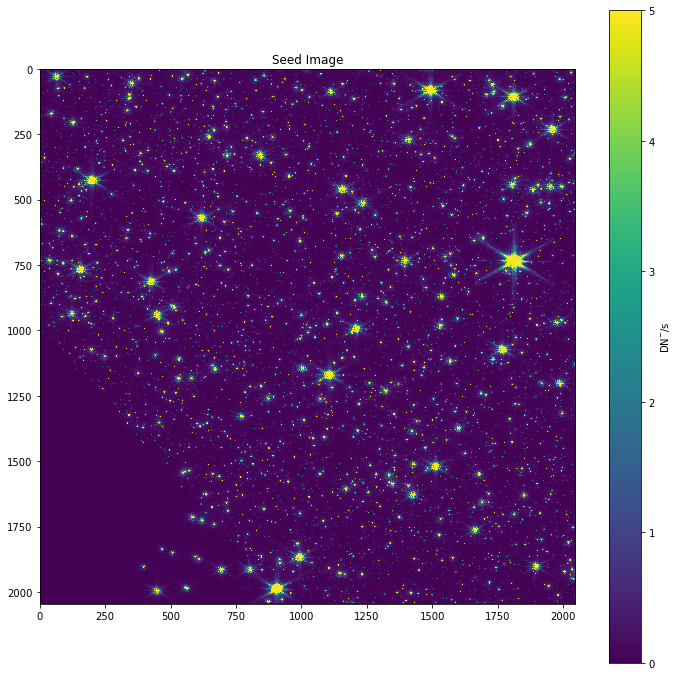

In [22]:
seed_file = 'jw01069001001_01101_00003_nrca1_uncal_F150W_seed_image.fits'
with fits.open(seed_file) as hdulist:
    seed_data = hdulist[1].data
print(seed_data.shape)
show(seed_data,'Seed Image',max=5)

### Linear file example
MIRAGE generates the linear and uncalibrated files. Here we display an example linear file. 

In [28]:
linear_file = 'jw01069001001_01101_00003_nrca1_linear.fits'
with fits.open(linear_file) as hdulist:
    linear_data = hdulist['SCI'].data
print(linear_data.shape)

(1, 5, 2048, 2048)


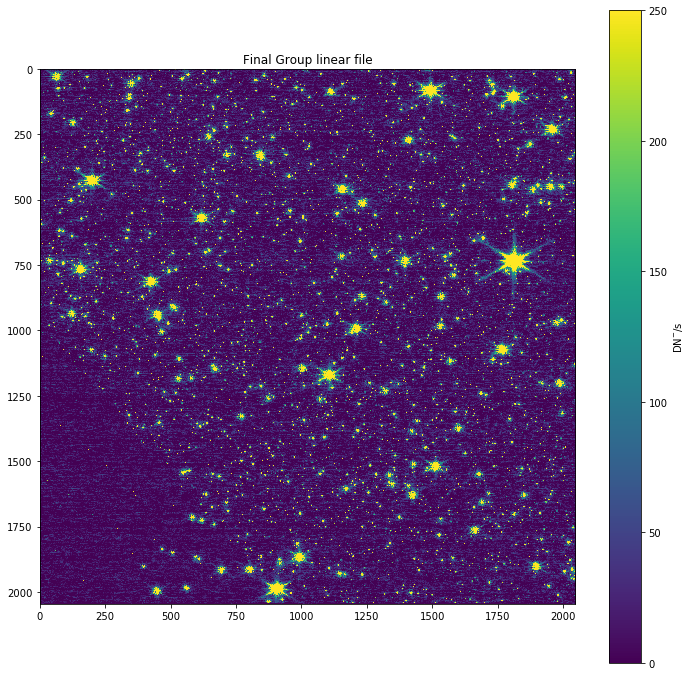

In [29]:
# this image has five groups
# we display the last group
show(linear_data[0, 4, :, :], "Final Group linear file", max=250)

### Raw uncalibrated file example
First let us displaay a single group, which is dominated by noise and detector artifacts.

In [30]:
raw_file = 'jw01069001001_01101_00003_nrca1_uncal.fits'
with fits.open(raw_file) as hdulist:
    raw_data = hdulist['SCI'].data
print(raw_data.shape)

(1, 5, 2048, 2048)


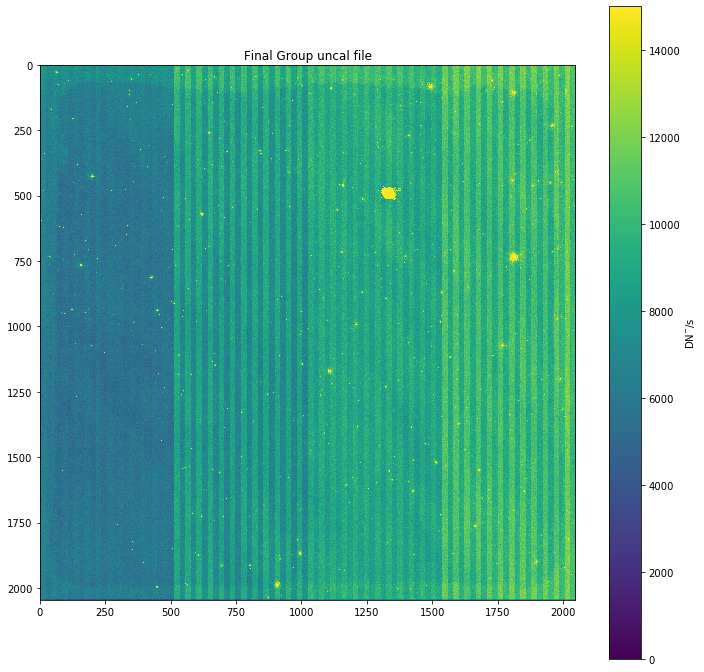

In [31]:
# the image has five groups. Here we display the last group
show(raw_data[0, 4, :, :], "Final Group uncal file", max=15000)

Many of the instrumental artifacts can be removed by looking at the difference between two groups. Raw data values are integers, so first make the data floats before doing the subtraction.

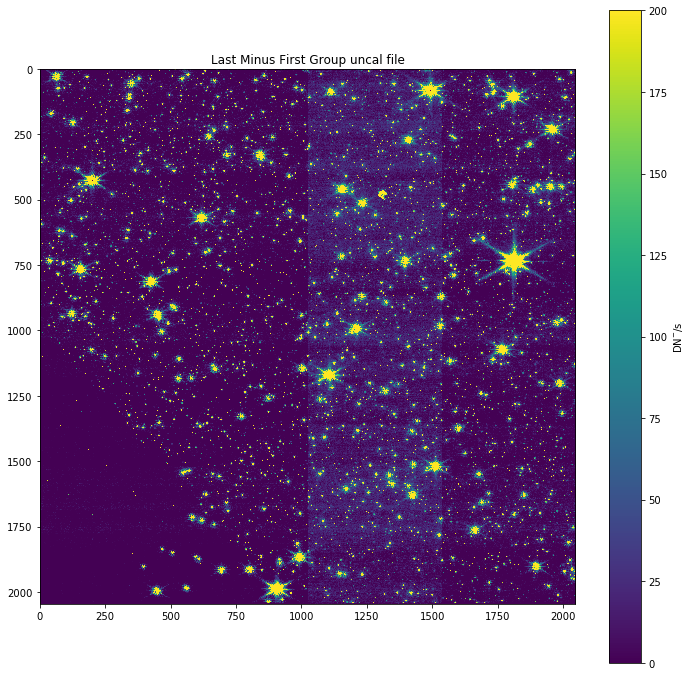

In [32]:
show(1. * raw_data[0, 4, :, :] - 1. * raw_data[0, 0, :, :], "Last Minus First Group uncal file", max=200)